## Combining the Datasets

In [1]:
import pandas as pd
from pathlib import Path
from utils import Language

In [2]:
datasets_path = Path('../output')
dataset_names = ('rosetta-code', 'github', 'generated', 'tl', 'func')

In [3]:
frames = []

for filename in dataset_names:
    path = datasets_path / f'{filename}.csv'
    df = pd.read_csv(path)
    frames.append(df)
    
tg_df = pd.read_csv(datasets_path / 'telegram.csv')
tg_df['label'].replace({'OTHER': 0, 'CODE': pd.NA}, inplace=True)
tg_df.dropna(inplace=True)
frames.append(tg_df)

df = pd.concat(frames, axis=0, ignore_index=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['label'] = pd.to_numeric(df['label'], downcast='integer')

In [4]:
df.to_csv(datasets_path / 'combined.csv', index=False, columns=('text', 'label'))

## Visualizing Code Snippets Statistics

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

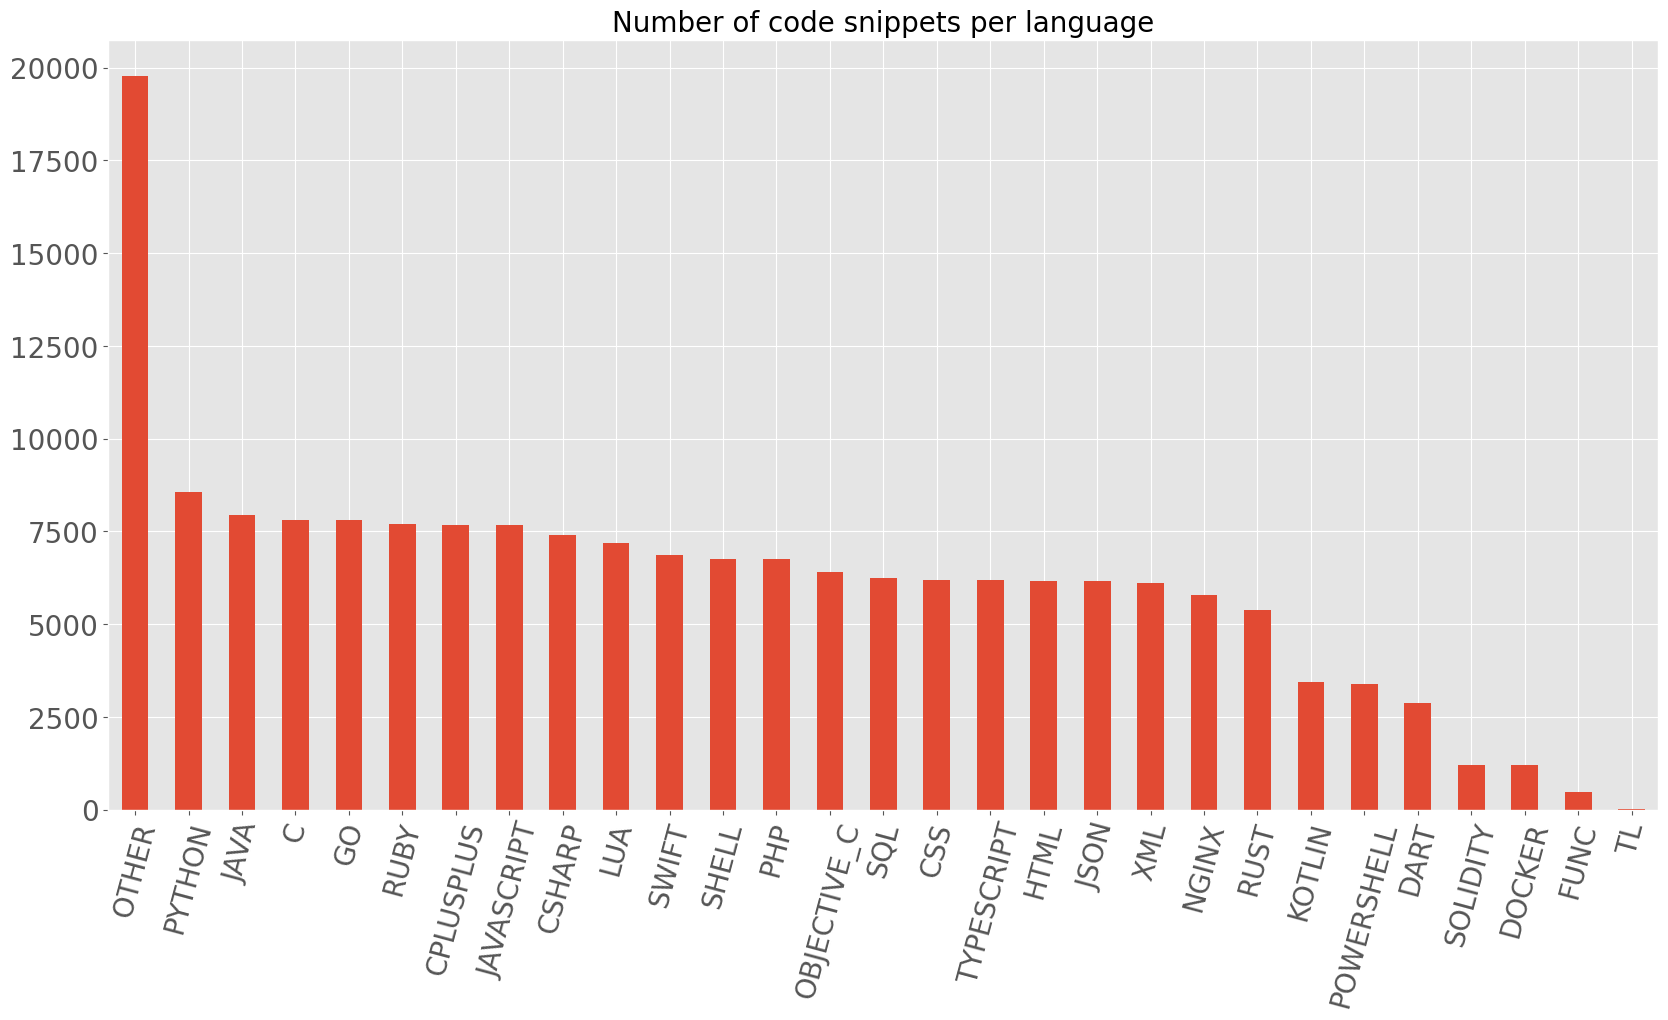

In [6]:
df['language'] = df['label'].map(lambda x: Language(x).name.removeprefix('TGLANG_LANGUAGE_'))
df['language'].value_counts().plot(kind='bar', figsize = (20,10), fontsize=20, rot=75)

plt.title('Number of code snippets per language', fontsize=20)
plt.show()